Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 107ms/step - accuracy: 0.8930 - loss: 0.3547 - val_accuracy: 0.9759 - val_loss: 0.0760
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9823 - loss: 0.0585 - val_accuracy: 0.9820 - val_loss: 0.0542
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.9905 - loss: 0.0324 - val_accuracy: 0.9815 - val_loss: 0.0548
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9939 - loss: 0.0208 - val_accuracy: 0.9839 - val_loss: 0.0514
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.9964 - loss: 0.0121 - val_accuracy: 0.9828 - val_loss: 0.0556
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.9845 - val_loss: 0.0546
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 109ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9823 - val_loss: 0.0641

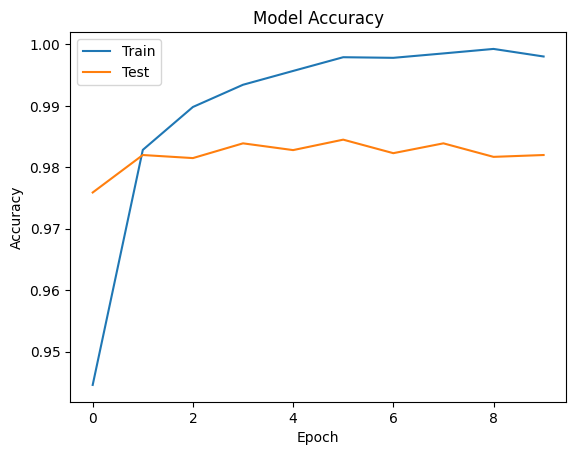

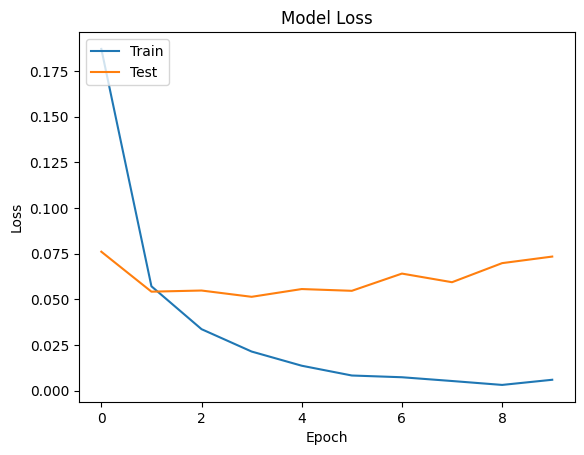

In [11]:

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical  # Fixed here
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode labels
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# Build model
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))  # You might consider changing this to (2,2)
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train model
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()